In [281]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cityblock
import itertools

In [282]:
file = "test.dat"
# file = "day.dat"
lines = open(file,'r').read().split('\n')
# np row major
raw_sky = np.array([list(line) for line in lines])
sky = raw_sky.copy()

for row_idx in np.where(np.all(sky == '.', axis=1))[0]:
    sky = np.insert(sky, row_idx+1, np.full((1,sky.shape[1]),'.'), axis=0)

for col_idx in np.where(np.all(sky == '.', axis=0))[0]:
    sky = np.insert(sky, col_idx + 1, np.full((1,sky.shape[0]),'.'), axis=1)

height, width = sky.shape[0], sky.shape[1]

In [311]:
for row in range(sky.shape[0]):
    for col in range(sky.shape[1]):
        print(sky[row,col],end='')
    print()

print()
print("....#........" == (''.join(sky[0,:].tolist())))
print(".........#..." == (''.join(sky[1,:].tolist())))
print("#............" == (''.join(sky[2,:].tolist())))
print("............." == (''.join(sky[3,:].tolist())))
print("............." == (''.join(sky[4,:].tolist())))
print("........#...." == (''.join(sky[5,:].tolist())))
print(".#..........." == (''.join(sky[6,:].tolist())))
print("............#" == (''.join(sky[7,:].tolist())))
print("............." == (''.join(sky[8,:].tolist())))
print("............." == (''.join(sky[9,:].tolist())))
print(".........#..." == (''.join(sky[10,:].tolist())))
print("#....#......." == (''.join(sky[11,:].tolist())))


....#........
..........#..
#............
.............
.............
........#....
.#...........
............#
.............
.............
..........#..
#....#.......

True
False
True
True
True
True
True
True
True
True
False
True


In [284]:
# find # in sky
galaxies = np.argwhere(sky == '#')
galaxies 

array([[ 0,  4],
       [ 1, 10],
       [ 2,  0],
       [ 5,  8],
       [ 6,  1],
       [ 7, 12],
       [10, 10],
       [11,  0],
       [11,  5]])

In [285]:
# find manhattan distance between galaxies
# only compute half of the matrix
max_distance = width + height + 1
distances = np.zeros((len(galaxies), len(galaxies)), dtype=int)
for i in range(len(galaxies)):
    for j in range(i,len(galaxies)):
        distances[i,j] = (cityblock(galaxies[i], galaxies[j]))
        # distances[i,j] = (abs(galaxies[i,0] - galaxies[j,0]) + abs(galaxies[i,1] - galaxies[j,1]))
        distances[j,i] = 0
        if i == j:
            distances[i,j] = 0
print("Number of pairs of galaxies:", ((distances.shape[0])*(distances.shape[0]-1))/2)
distances.tolist()

Number of pairs of galaxies: 36.0


[[0, 7, 6, 9, 9, 15, 16, 15, 12],
 [0, 0, 11, 6, 14, 8, 9, 20, 15],
 [0, 0, 0, 11, 5, 17, 18, 9, 14],
 [0, 0, 0, 0, 8, 6, 7, 14, 9],
 [0, 0, 0, 0, 0, 12, 13, 6, 9],
 [0, 0, 0, 0, 0, 0, 5, 16, 11],
 [0, 0, 0, 0, 0, 0, 0, 11, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [294]:
# Between galaxy 1 and galaxy 7: 15
# Between galaxy 3 and galaxy 6: 17
# Between galaxy 8 and galaxy 9: 5
# Between galaxy 5 and galaxy 9: 5

print(distances[0,6], "should be 15")
print(distances[2,5], "should be 17")
print(distances[7,8], "should be 5")
print(distances[4,8], "should be 5")


16 should be 15
17 should be 17
5 should be 5
9 should be 5


In [286]:
np.sum(distances)

384

In [287]:
# find the shortest path, add it to sum, and remove the from the list
shortest_paths = []
# shortest_path = np.argmin(distances, keepdims=True)
# print(shortest_path)
# distances[shortest_path]
np.unravel_index(distances.argmin(), distances.shape)


(0, 0)

In [288]:
# find the closest galaxy to each galaxy
# don't count the galaxy itself or zero distance

# test answer is 374
# 3039 is too low
closest = np.where(distances>0,distances,distances.max()).min(axis=1)
print(closest)
np.sum(closest)


[ 6  6  5  6  6  5  6  5 20]


65

In [289]:
tuple(tuple(x) for x in galaxies.tolist())

((0, 4), (1, 10), (2, 0), (5, 8), (6, 1), (7, 12), (10, 10), (11, 0), (11, 5))

In [290]:
G = nx.Graph()
galaxy_nodes = tuple(tuple(x) for x in galaxies.tolist())
for node_coords in galaxy_nodes:
    u, v = node_coords
    x, y = v, height-u
    G.add_node(node_coords, pos=(x, y))


# add edges with weight of manhattan distance
for i in range(len(galaxies)):
    for j in range(i,len(galaxies)):
        if distances[i,j] != max_distance and distances[i,j] != 0:
            G.add_edge(galaxy_nodes[i], galaxy_nodes[j], weight=distances[i,j])


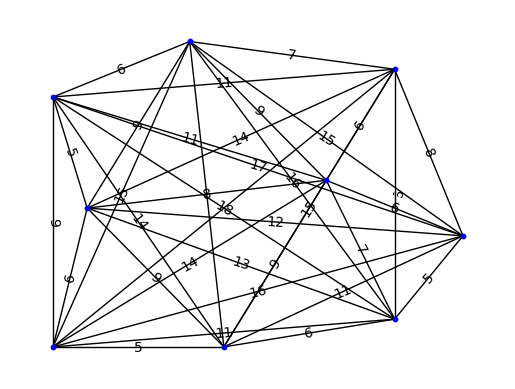

<Figure size 1300x1200 with 0 Axes>

In [291]:
# draw graph with labels on weighted edges
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

nx.draw(G, pos, node_color='blue', node_size=10, with_labels=False)
figsize = (sky.shape[1], sky.shape[0])
plt.figure(figsize=figsize)
plt.show()